# Phase-4-project
![Alt text](<timepic.png>)

## Moringa Phase 4 Project Submission

#### GROUP 4:

- Student name: Kenneth Karanja
- Student name: Pete Njagi
- Student name: James Koli
- Student name: Tom Mwabire
- Student name: Paul Mwangi
- Student name: Lee Ndung'u
- Student name: Edwin Mwenda

Scheduled project review date/time: April 12th 2024

# Data Science Jobs Anlysis Project
#### Important Project Files:

1. Group4.ipynb (Main Juypter document)
2. Presentation.pdf (Presentation)
3. Zillow_data.csv (Main Data)
4. Project Report Pdf

### OVERVIEW


Real estate refers to land, buildings, and other physical property, including natural resources like crops, minerals, or water, that can be purchased, sold, leased, or rented for a variety of reasons. Real estate is an important component of the global economy, serving residential, commercial, industrial, and agricultural functions. Real estate investments can generate both short- and long-term profits through rental revenue, property appreciation, and value-added investments like renovations and projects.

>With a population of over 330 million, the real estate industry in the United States contributes significantly to the country's economy, accounting for over 6% of GDP. This industry has several sub-sectors, including residential and commercial real estate, real estate development, property management, and real estate investment trusts (REITs).

>Residential real estate is the largest subsector, accounting for the vast bulk of real estate transactions in the country. Population growth, household formations, and employment prospects all contribute to the demand for residential real estate. The commercial real estate sector, which includes office buildings, retail spaces, and industrial assets, is equally important to the economy, as these properties enable businesses to function and flourish.

### PROBLEM STATEMENT



Real estate represents a significant percentage of most people's wealth, particularly among American homeowners. The real estate market is driven by a variety of factors, including government policies, possible buyer demographics, affordability, disparities in housing access, location, capital flows and liquidity, and the present economic situation. Buyers may find the process laborious due to the many factors. Naruto consultants intends to develop a predictive time series model to help pick the top five zipcodes to invest in.


#### a. Problem statement
Real estate represents a significant percentage of most people's wealth, particularly among American homeowners. The real estate market is driven by a variety of factors, including government policies, possible buyer demographics, affordability, disparities in housing access, location, capital flows and liquidity, and the present economic situation. Buyers may find the process laborious due to the many factors. RealEstateEdge Advisors" Consultants intends to develop a predictive time series model that will assist in determining the top five zipcodes to invest in.


#### Main Objectives
 * To develop a time series model that would predict the top five zipcodes to invest in
 

#### Specific Objectives
 * To act as a consultant for RealEstateEdge Advisors" investment firm and provide a solid recommendation for the top 5 best zip codes for investment
 *  To identify changes in house returns over time.

### b. Metric of Success
* The model will be regarded successful if it earns the highest ROI and has an RMSE of less than 5%.

### c. Recording the Experimental Design

1. Importing Libraries
2. Loading Dataset
3. Cleaning up the data
4. Validation of external data sources.
5. Performing Exploratory Data Analysis
6. Model Development and Model performance evaluation
7. Use model to forecast the prices
8. Conclusions and Future Improvement Ideas


### d. Data Understanding

This Dataset was obtained from [Zillow website](https://github.com/learn-co-curriculum/dsc-phase-4-choosing-a-dataset/blob/main/time-series/zillow_data.csv) and comprises of **14723 rows and 272 columns** in Wide Format. 

|Dataset columns|Column Description|Data type|
|:---|:---|---|
|RegionID|Represents a unique ID for each region.|integer (int64)|
|RegionName|Represents the name of the region/ also the zipcode|integer (int64)|
|City|Represents the city where the region is located.|	string (object)|
|State|	Represents the state where the region is located.|	string (object)|
|Metro|	Represents the metropolitan area where the region is located (if applicable).|	string (object)|
|CountyName|Represents the name of the county where the region is located.|string (object)|
|SizeRank|Represents the relative size of the region compared to other regions in the dataset.|	integer (int64)|
|1996 upto 2018|Represents the median home price for the region in months and years	|float (float64)|



## 1. Importing the Libraries

In [57]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
sns.set()

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from matplotlib.pylab import rcParams


## 2.Loading The Data

In [58]:
# displaying all columns
pd.set_option("display.max_columns",None)

In [59]:
# load the data from the csv file
df = pd.read_csv('zillow_data.csv')
# showing the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [60]:
#show the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,1732

Creating an Return On Investment column so that the top five zipcodes can be identified

In [61]:
# creating a column of %ROI
df["%ROI"] = ((df["2018-04"] / df["2012-01"]) ** (1 / (2018-2012)) - 1) * 100

In [62]:
# creating a column of actual ROI
df['ROI price'] = df["2018-04"] - df["2012-01"]-1

In [63]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', '%ROI', 'ROI price'],
      dtype='object', length=274)

In [64]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,%ROI,ROI price
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.

In [65]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,%ROI,ROI price
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.390900e+04,1.390900e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.411000e+04,1.411000e+04,1.411000e

## 3. Cleaning the Dataset

In [66]:
# Reviewing the shape of the dataframe
df.shape

(14723, 274)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 274 entries, RegionID to ROI price
dtypes: float64(221), int64(49), object(4)
memory usage: 30.8+ MB


In [68]:
# checking the top 10 columns and their datatypes
df.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    14723 non-null  int64  
 1   RegionName  14723 non-null  int64  
 2   City        14723 non-null  object 
 3   State       14723 non-null  object 
 4   Metro       13680 non-null  object 
 5   CountyName  14723 non-null  object 
 6   SizeRank    14723 non-null  int64  
 7   1996-04     13684 non-null  float64
 8   1996-05     13684 non-null  float64
 9   1996-06     13684 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.1+ MB


#### Since it is impossible for the exploration to be done as is originally, a pd.melt function has been applied to a form where it is easily readable and can be used for modelling and exploration.
The dataset will be transformed from a wide formart to a long format

In [69]:
# convert wide format to long format
data = pd.melt(df, 
               id_vars=['RegionID','RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','%ROI','ROI price'], 
               var_name='Date')

# rename RegionID to zipcode
data = data.rename(columns={'RegionName': 'Zipcode','value':'Price'})

#convert zipcode to categorical datatype
data['Zipcode'] = data['Zipcode'].astype('str')

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m')

data.head()

,RegionID,Zipcode,SizeRank,City,State,Metro,CountyName,%ROI,ROI price,Date,Price
0,84654,60657,1,Chicago,IL,Chicago,Cook,5.730851,292899.0,1996-04-01,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,8.285652,122199.0,1996-04-01,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,4.828700,81299.0,1996-04-01,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,5.856559,378099.0,1996-04-01,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,1.305960,9099.0,1996-04-01,77300.0


In [70]:
data.shape

(3901595, 11)

The dataset has now changed to 3901595 rows and 11 columns

In [71]:
#Checking for duplicates within the dataset
print(f'The number of duplicates within the dataset is : {data.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [72]:
# Checking for missing values
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
%ROI          1.521429
ROI price     1.521429
Date          0.000000
Price         4.021202
dtype: float64

The metro column will be filled with missing, the rest of the columns which have missing columns will be left as is and will be handled in the preprocessing stage

In [73]:
# filling missing values 
data['Metro'].fillna('Missing',inplace = True)

In [74]:
# Recheck for missing values in Metro column
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         0.000000
CountyName    0.000000
%ROI          1.521429
ROI price     1.521429
Date          0.000000
Price         4.021202
dtype: float64

In [75]:
# statistical description of numerical variables
data.describe()

,RegionID,SizeRank,%ROI,ROI price,Date,Price
count,3.901595e+06,3.901595e+06,3.842235e+06,3.842235e+06,3901595,3.744704e+06
mean,8.107501e+04,7.362000e+03,5.468191e+00,8.927807e+04,2007-04-01 18:12:13.584906496,2.076064e+05
min,5.819600e+04,1.000000e+00,-8.800055e+00,-6.940100e+04,1996-04-01 00:00:00,1.130000e+04
25%,6.717400e+04,3.681000e+03,2.854330e+00,2.279900e+04,2001-10-01 00:00:00,9.790000e+04
50%,7.800700e+04,7.362000e+03,4.678817e+00,4.739900e+04,2007-04-01 00:00:00,1.476000e+05
75%,9.092100e+04,1.104300e+04,7.509623e+00,9.899900e+04,2012-10-01 00:00:00,2.372000e+05
max,7.538440e+05,1.472300e+04,2.282181e+01,5.827699e+06,2018-04-01 00:00:00,1.931490e+07
std,3.193304e+04,4.250165e+03,3.654485e+00,1.630284e+05,NaN,2.400207e+05


In [76]:
#statistical description of categorical variables
data.describe(include=['object'])

,Zipcode,City,State,Metro,CountyName
count,3901595,3901595,3901595,3901595,3901595
unique,14723,7554,51,702,1212
top,60657,New York,CA,Missing,Los Angeles
freq,265,30210,324360,276395,69960


## 4. External Dataset Validation

The Zillow dataset was compared with external datasets from the National Association of Realtors (NAR), the US Census Bureau, and the Bureau of Economic Analysis (BEA). The NAR provides home sales and price data, while the US Census Bureau provides population data, and the BEA provides GDP data. Analysis was done on the trend of home prices in Washington from 2002 to 2018 using the Zillow dataset and compared it to the trend in the NAR dataset. 

Also the impact of the 2008 housing market bubble burst on home prices in Washington was examined using the NAR dataset and compared it to Zillow's trend data. Additionally, analysis on the trend of population and GDP growth was done using the US Census Bureau and BEA data, respectively, to examine their impact on the real estate market in Washington and compared them to Zillow's data. 

Based on the results,the Zillow dataset seems to be good to proceed with modeling. The findings can be used to make informed decisions and provide recommendations for the real estate industry in Washington, while keeping in mind the limitations of the data analysis and the need for further research to gain a complete picture of the real estate market in the US. The full article can be found in the link below


[Washington center for Real Estate Research](https://wcrer.be.uw.edu/archived-reports/)

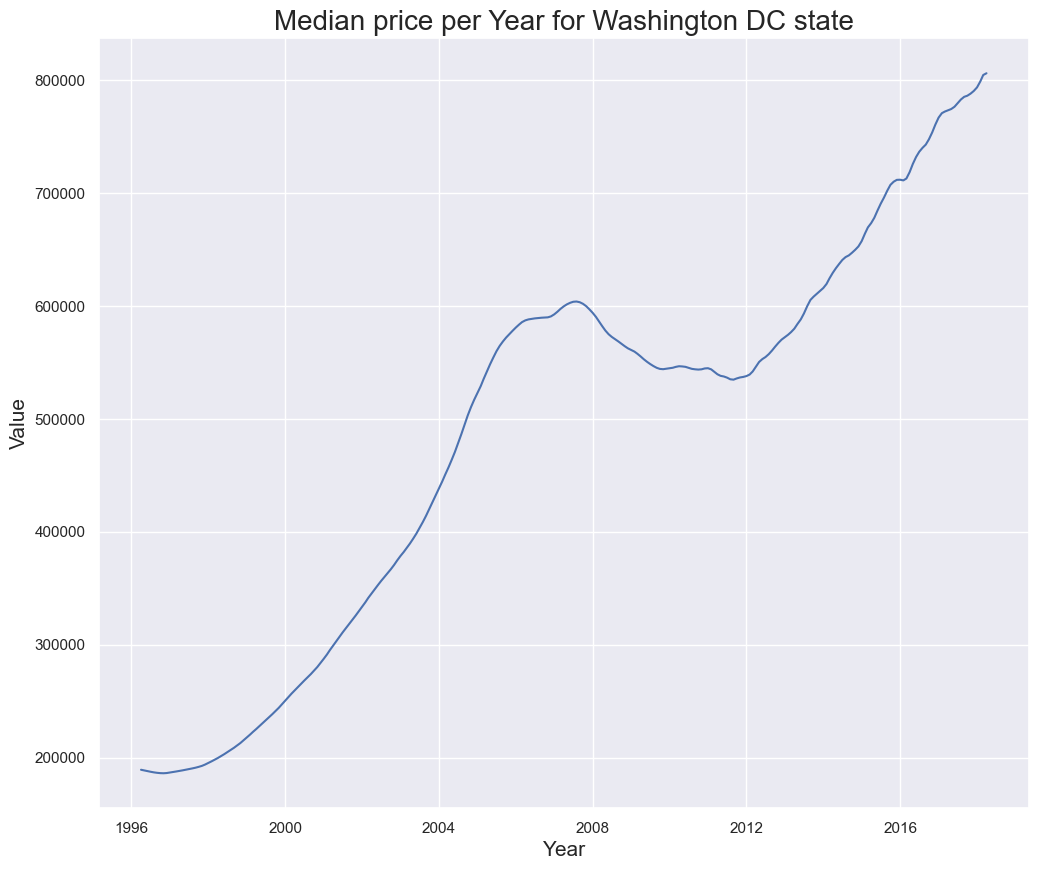

In [77]:
# Washington DC state
state_data = data[data['State'] == 'DC']
yearly_data = state_data.groupby('Date').agg({'Price': 'mean'})

# Plotting the median prices of washington DC over the years
plt.figure(figsize=(12,10))
plt.plot(yearly_data.index, yearly_data['Price'])

plt.title('Median price per Year for Washington DC state',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.show()

## 5. **Exploratory Data Analysis**
### 5.1 **Univariate Analysis**

### What are the top 10 most popular Counties?

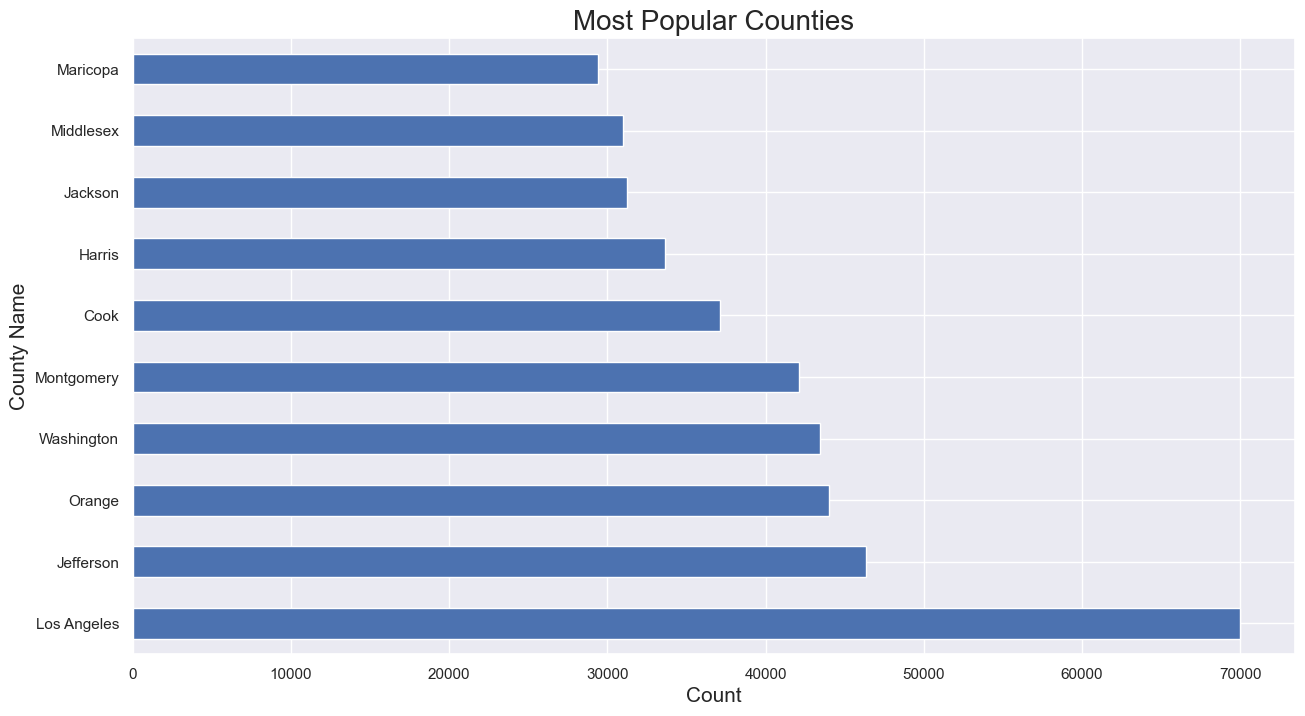

In [78]:
#Plotting the most popular counties in the dataset
plt.figure(figsize=(15,8))
data.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Most Popular Counties",fontsize=20);

Los Angeles is the most popular County in the dataset.

### What are the top 10 Most popular States?

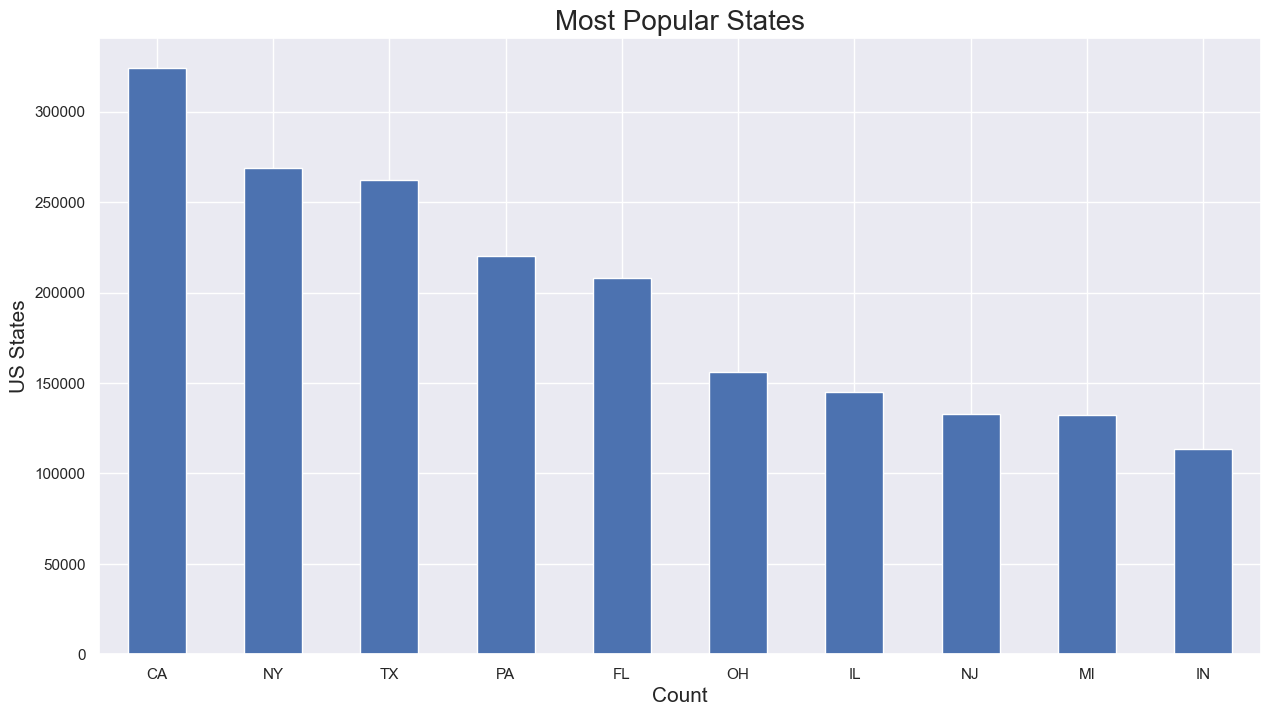

In [79]:
# plotting the most popular states in the dataset
plt.figure(figsize=(15,8))
data.State.value_counts()[:10].plot(kind="bar")
plt.xlabel("Count",fontsize=15)
plt.ylabel("US States",fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular States",fontsize=20);

California is the most popular state.

### What are the top 10 Most Popular Cities

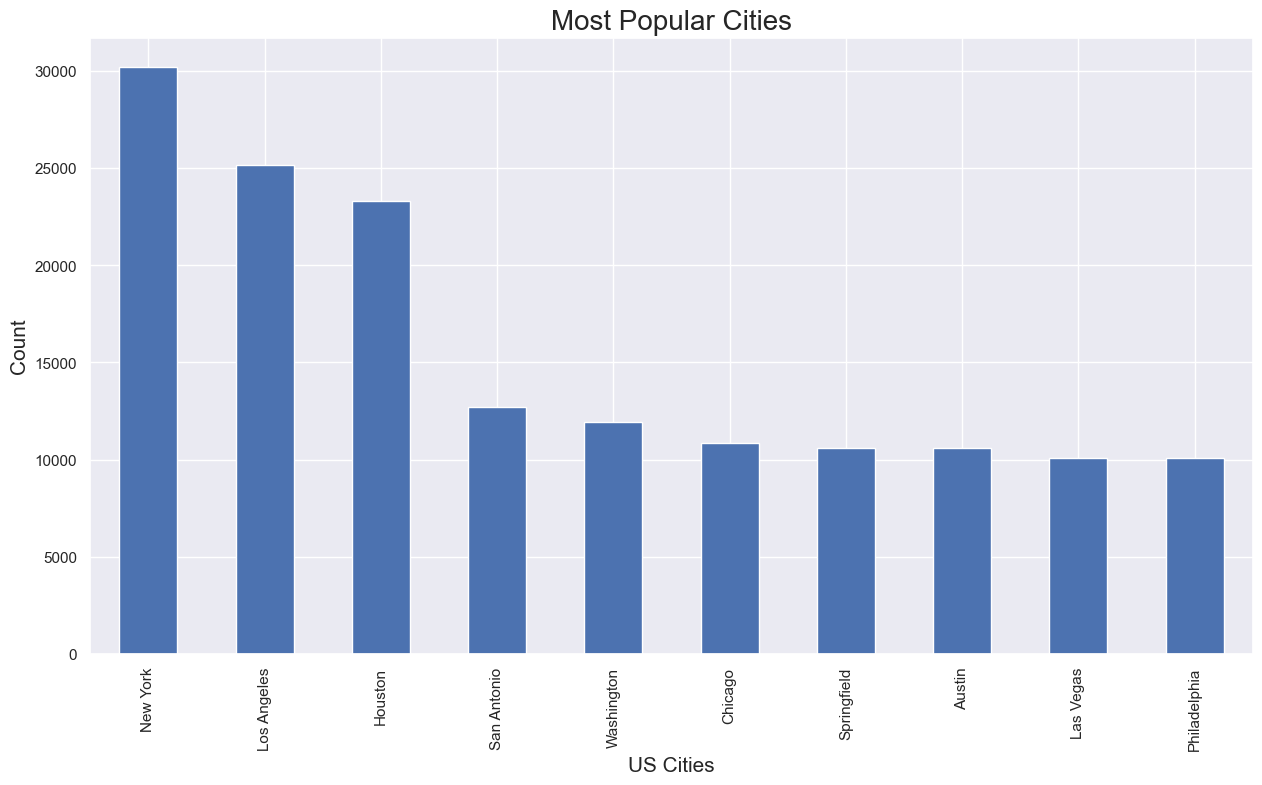

In [80]:
# plotting the most popular cities in the dataset
plt.figure(figsize=(15,8))
data.City.value_counts()[:10].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

New York is the most popular city followed by Los Angeles.

### 5.2 **Bivariate Analysis**
### **What is the average price per state?**

In [83]:
# function to convert columns to numeric types
pd.to_numeric()

TypeError: to_numeric() missing 1 required positional argument: 'arg'

In [81]:
# calculate the average profit margin for each city
df_avg_value = data.groupby('State').mean().reset_index()

# sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('Price', ascending=False)

# select the top 20 cities by average profit margin
top_states = df_sorted_states['State'].head(10)

# filter the DataFrame to include only the top 20 cities
df_top_states = data[data['State'].isin(top_states)].groupby("State").mean().sort_values("Price",ascending=False)

TypeError: agg function failed [how->mean,dtype->object]

NameError: name 'df_top_states' is not defined

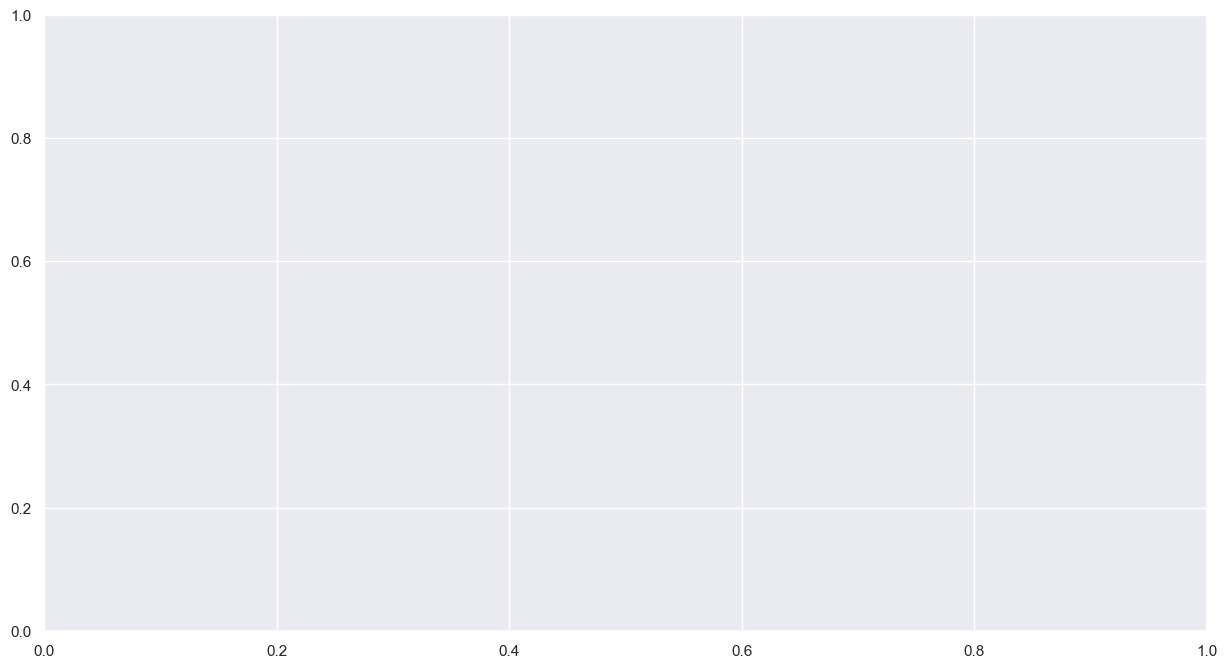

In [ ]:
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=df_top_states.index, y=df_top_states.Price,ax=ax)

# set the title and axis labels
ax.set_title('House Values in (top 10 States)',fontsize=20)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Average Property Value',fontsize=15)

# display the plot
plt.show();

It can be observed that Carlifornia, Washington DC and Hawaii have the most average property value

### What is the mean percentage return on investment by zipcode?

In [ ]:
# grouping data by mean %ROI and selecting top 30 zipcodes
grouped1 = data.groupby('Zipcode')
state_values1 = grouped1['%ROI'].mean()
state_values_df1 = state_values1.reset_index(name='% ROI')
state_values_df1 = state_values_df1.sort_values(by='% ROI', ascending=False)
top_thirty_zipcodes_df_roi = state_values_df1.head(10)

In [ ]:
# plotting the %ROI by zipcode
plt.figure(figsize=(15,8))
plt.bar(top_thirty_zipcodes_df_roi['Zipcode'], top_thirty_zipcodes_df_roi['% ROI'])
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('% ROI',fontsize=15)
plt.title('% ROI by Zipcode',fontsize=20)
plt.xticks(rotation=90)
plt.show()

From this graph, zipcode 85035 seems to be the most profitable zipcode at 22.8% ROI from 2012 to 2018.

### What is the change in house prices from 1996 to 2018?

In [ ]:
# creating a data series to check the prices of houses over time
ts = data.copy()
ts.set_index("Date",inplace=True)
ts = ts["Price"]

In [26]:
# plotting mean house price
plt.figure(figsize=(15,10))
ts.resample("A").mean().plot()
plt.ylabel("Mean Price",fontsize=15)
plt.title("Plot of Mean House Price from 1996 to 2018 in USA",fontsize=20);

NameError: name 'ts' is not defined

<Figure size 1500x1000 with 0 Axes>

As observed, the percentage of return on investents for the top five zipcodes had a crash in 2008 to 2012 and then from there they all have an upward linear trend.

## **6. Data Preprocessing**

When dealing with time series models, an assumption that the data is stationary is made, that is, that for each lag, the mean, variance and autocorrelation of the data do not vary across time.

Stationary Time Series makes the process of model development efficient. Before modelling, the data will be verified to be stationary by performing the Dickey Fuller test and also using the Rolling mean.

In the event the data is not stationary, differencing will be done to ensure it is stationary.

In [27]:
# Filter data for the top 5 zipcodes based on %ROI
zipcode = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcode)]

# Group data by date and zipcode, and calculate the mean price for each group and selecting from 2012
grouped_5 = top_5.groupby(['Date', 'Zipcode']).mean().reset_index()
final_df = grouped_5[grouped_5.Date >= "2005-01-01"]

final_df.head()

TypeError: agg function failed [how->mean,dtype->object]

Creating a dataframe to check the change over price in time for the top five zipcodes

In [28]:
TS_zc5 = final_df.drop(['RegionID', 'SizeRank', '%ROI', 'ROI price'],axis=1)

TS_zc5 = TS_zc5.set_index('Date')
print('Time series data for the 5 zipcodes:\n',TS_zc5.head())

#Create individualized time series for each zipcode.
#List containing the 5 different time series.
df_ts = []
for zipcode in TS_zc5.Zipcode.unique():
    # Create separate dataframes for each zipcode with a monthly frequency.
    df_zip = TS_zc5[TS_zc5['Zipcode']==zipcode].asfreq('MS')
    df_ts.append(df_zip)
print('\nZipcode 48894 time series:')
df_ts[0].head()

NameError: name 'final_df' is not defined

In [29]:
# plotting home prices by zipcodes
for i in range(5):
    df_ts[i].Price.plot(label=df_ts[i].Zipcode[0],figsize=(15,8))
    plt.legend()
plt.title("Home Prices by Zipcode",fontsize=20); 

NameError: name 'df_ts' is not defined

It can be observed like before that there was a dip in the prices due to the 2008 market crash and then the prices continued to rise over time from 2012 all the way to 2018.

A new column called ret is created to check the returns per month

In [32]:
# creating a column called "ret" representing monthly returns on investment
for zc in range(len(df_ts)):
    df_ts[zc]['ret']=np.nan*len(df_ts[zc])
    for i in range(len(df_ts[zc])-1):
        df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1
        
#Plot the monthly returns of each zipcode
for i in range(len(df_ts)):
    df_ts[i].ret.plot(figsize=(15,10),label=f"Zipcode: {df_ts[i].Zipcode[0]}")
    plt.title(f'Monthly Returns per Zipcode',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Returns (%)',fontsize=15)
    plt.legend(loc='best')

NameError: name 'df_ts' is not defined

It can be observed that there is no clear trend which could indicate stationarity. Further tests are then carried out to determine this.

# Rolling Mean to check for stationarity

In [33]:
#Plot each of the zipcodes’ returns with their respective rolling mean and rolling standard deviation.
#Visually test for stationarity.
for i in range(len(df_ts)):
    rollingmean = df_ts[i].ret.rolling(window = 12, center = False).mean()
    rollingstd = df_ts[i].ret.rolling(window = 12, center = False).std()
    fig = plt.figure(figsize=(15,8))
    original = plt.plot(df_ts[i].ret, color="blue",label="Original")
    mean = plt.plot(rollingmean, color="red", label="Rolling Mean")
    std = plt.plot(rollingstd, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}',fontsize=20)
    plt.show()

NameError: name 'df_ts' is not defined

From the graphs above there are some states that exhibit non-stationarity but to be certain, a Dickey Fuller test is performed.

In [ ]:
# performing Dicky-fuller test for stationarity
for i in range(5):
    results = adfuller(df_ts[i].ret.dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

In [ ]:
# differencing the non stationary zip codes
for i in [0,2,3,4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(df_ts[i].ret.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

The data is now fully stationary! Modelling can now be done.

## **7. Model Development**

Since the aim is to identify the top five zipcodes to invest in, there will be five different models for each of the top five zipcodes to forecast their prices and thus give the investors and informed decision.

In [35]:
# creating individual time series 
ts_85035 = df_ts[1].ret.dropna()
ts_85008 = df_ts[0].ret.diff().dropna()
ts_94590 = df_ts[2].ret.diff().dropna()
ts_94601 = df_ts[3].ret.diff().dropna()
ts_94804 = df_ts[4].ret.diff().dropna()

NameError: name 'df_ts' is not defined

In [36]:
# defining a function that plots acf and pacf plots
def acf_pacf(df,alags=40,plags=40):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

In [37]:
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

NameError: name 'alags' is not defined

In [38]:
# plotting acf and pacf for zipcode 85035
acf_pacf(ts_85035)

NameError: name 'ts_85035' is not defined

In [39]:
# using auto arima to find the best p,d,q for our model
model = pm.auto_arima(ts_85035, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

NameError: name 'pm' is not defined

In [40]:
#splitting the data into train and test
train_85035 = ts_85035[:'2015-01']
test_85035 = ts_85035['2015-02':]

NameError: name 'ts_85035' is not defined

Fitting an ARIMA Model on the training series. The parameters to be used will be gotten from the AUTO ARIMA model above.

In [41]:
# initializing ARIMA model
ARIMAmodel = ARIMA(train_85035, order=(2, 0, 1))

NameError: name 'train_85035' is not defined

In [42]:
# fit the model
ARIMAmodel = ARIMAmodel.fit()

NameError: name 'ARIMAmodel' is not defined

In [43]:
# printing the model summary
print(ARIMAmodel.summary())
ARIMAmodel.plot_diagnostics(figsize=(18,18))
plt.show()

NameError: name 'ARIMAmodel' is not defined

The residuals should not be correlated and they should have a normal distribution to satisfy the normality assumptions.

1. The qq- plot on the bottom left shows that the residuals follow a linear trend line hence they are normally distributed.

2. The correlogram plot on the bottom left show there are low correlations with their lagged version. This tells us that there isn't any obvious seasonality in our series.

3. The histogram has a bell curve showing that the residuals are normally distributed which is a good thing.



# Testing the model's performance

In [ ]:
# creating a table of the upper and lower limits
pred = ARIMAmodel.get_prediction(start=pd.to_datetime('2015-02'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf.head()

Plotting the training data against the test data

In [44]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = ts_85035.plot(label='observed',c="blue")

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9,c="red")

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='gray', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Returns',fontsize=15)
ax.set_title('Testing Forecasting Model Performance',fontsize=20)
plt.legend()

plt.show()

NameError: name 'ts_85035' is not defined

# Model Evaluation

In [46]:
#Getting the rmse for the model
MSE(test_85035,pred.predicted_mean,squared=False)

NameError: name 'test_85035' is not defined

In [47]:
This tells us that our the monthly returns would be off by 0.005% if this model is used. Which is a good thing since it is not off by much.

SyntaxError: invalid syntax (2575044509.py, line 1)

#### **Forecasting for the next 3 years**

In [49]:
# Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
ARIMA_MODEL = ARIMA(ts_85035, 
                    order=(2,0,1), 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(full_output.summary())

NameError: name 'ts_85035' is not defined

In [50]:
# Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction.head()

NameError: name 'full_output' is not defined

NameError: name 'ts_85035' is not defined

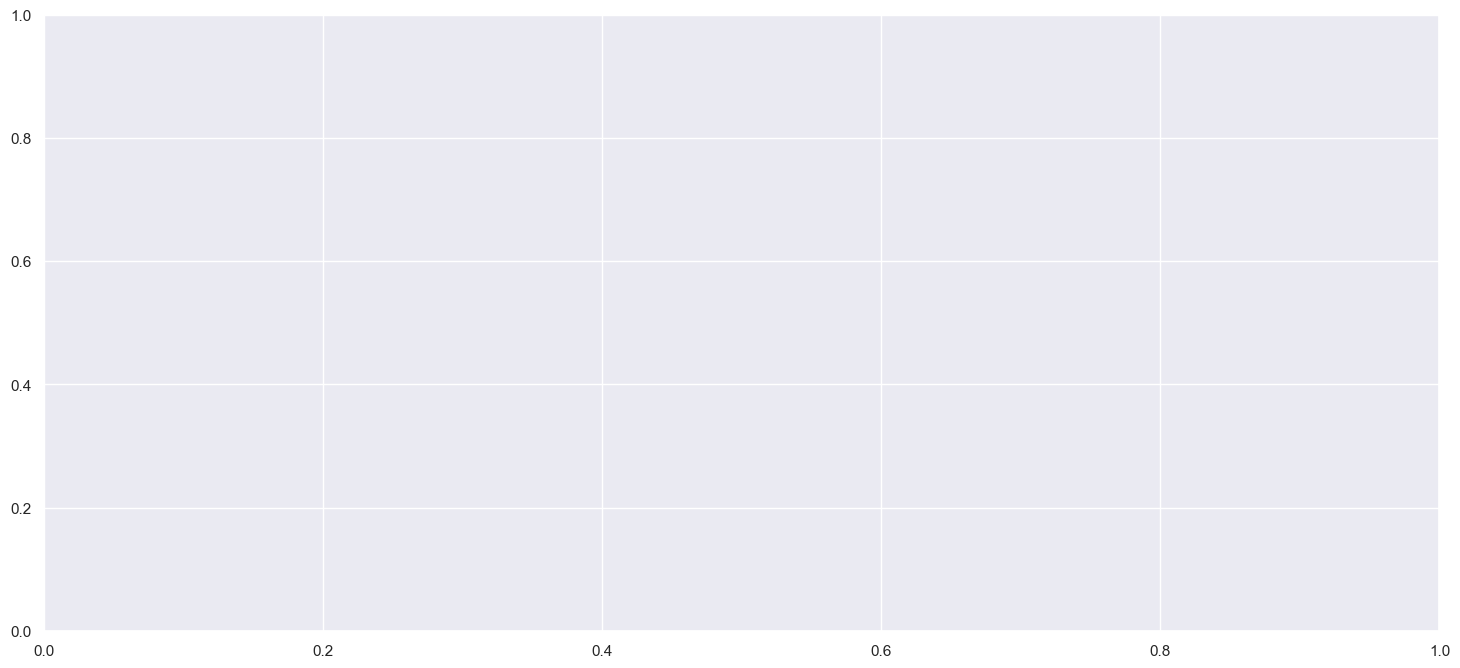

In [51]:
# Plotting our Forecast

fig, ax = plt.subplots()
ts_85035.plot(ax=ax,label='Real Values',c="blue")


future_prediction['prediction'].plot(ax=ax,label='predicted value',c="red")

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'], 
                y2= future_prediction['upper'],color='gray',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("% Home Prices",fontsize=15)
plt.title('Average Monthly Returns - 85035 - With Forecasted Values & Confidence Intervals',fontsize=20)
plt.show()

### **Forecasting for every zipcode**

In [52]:
zip_predictions = {}

# Creating a for loop to forecast for every zipcode
for i in range(len(df_ts)):

    # selecting every individual series
    series = df_ts[i]["Price"]
    
    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]
    
    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]
    
    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series, 
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)
   
    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = SARIMAX(recent_series, 
                          order= auto_model.order, 
                          seasonal_order= auto_model.seasonal_order, 
                          enforce_stationarity=False, 
                          enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['Price'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction'] 
    
    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])

NameError: name 'df_ts' is not defined

# **8. Conclusion and Recommendations**

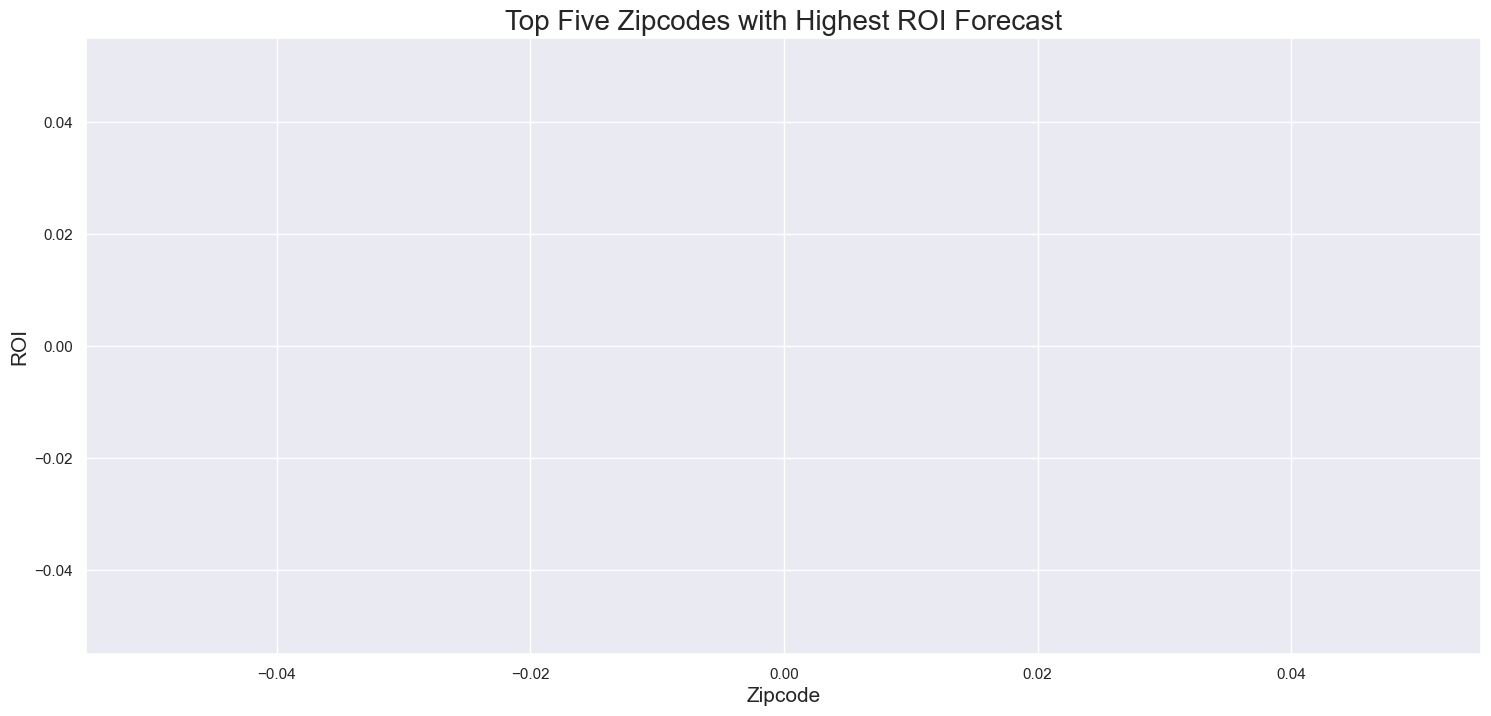

In [53]:
# Get the top five zipcodes with the highest ROI
top_zipcodes = sorted(zip_predictions, key=zip_predictions.get, reverse=True)[:5]

# Create a list of ROI values for the top five zipcodes
roi_values = [zip_predictions[zipcode] for zipcode in top_zipcodes]

# Create a bar graph of the top five zipcodes and their corresponding ROI values
plt.bar(top_zipcodes, roi_values)
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('ROI',fontsize=15)
plt.title('Top Five Zipcodes with Highest ROI Forecast',fontsize=20)
plt.show()

From the above graph the zipcode of 94804 has the highest ROI forecast so it would be beneficial if the investor invested in this zipcode.

In [54]:
zip_roi_dict = {zipcode: zip_predictions[zipcode] for zipcode in top_zipcodes}

# Convert the dictionary to a pandas dataframe and sort it by ROI values in descending order
zip_roi_df = pd.DataFrame.from_dict(zip_roi_dict, orient='index', columns=['% ROI'])
zip_roi_df = zip_roi_df.sort_values(by='% ROI', ascending=False)

# Print the dataframe
zip_roi_df.index.name = "Zipcode"

In [55]:
zip_roi_df

,% ROI
Zipcode,


All the Zipcodes have an encouraging predicted price seeing as they are in the positive apart from the 85035 zipcode.

Based on the above graph, we can conclude our top five recommendations and their expected ROI after three years.

The investor can then decide to invest in any of the above zipcodes apart from 85035 which does not have a positive return on investment.

In [ ]:
# **9. Follow up questions**

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data?
Yes the data was correct and verified

b). Do we need other data to answer our question?
Yes, it would be effective if we had other additional information apart from the price only to determine whether other social/economic factors would determine whether one would invest in a certain area or not.
Facilities like schools, hospitals, level of security can affect whether one would invest in a given area or not.

c). Did we have the right question?
The question chosen was correct 